In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
plt.style.use('seaborn')
sns.set(font_scale=2.5) 

In [2]:
os.chdir(r'/home/skang/Documents/kaggle/home_credit/notebook')
os.path.abspath(os.curdir)

'/home/skang/Documents/kaggle/home_credit/notebook'

# Read Data

In [3]:
print(os.listdir("../input/"))

['bureau.csv', 'bureau_balance.csv', 'home-credit-default-risk.zip', 'application_train.csv', 'POS_CASH_balance.csv', 'credit_card_balance.csv', 'sample_submission.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'application_test.csv', 'previous_application.csv']


In [4]:
# Training data
app_train = pd.read_csv('../input/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


training data는 307511개의 샘플과 `target`을 포함하여 122개의 특징으로 구성된다.

In [5]:
app_test = pd.read_csv('../input/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


test 데이터는 target을 제외한 121개의 특징들로 구성된다.

# EDA

In [6]:
class MetaTable():
    def __init__(self, df: pd.DataFrame=None):
        self.df = df
        self.meta=None
        
    #초기 meta 데이터 생성
    def _first_meta_table(self):
        if self.meta:
            print("Already exists")
            return self.meta
        
        print(f"dataset shape: {self.df.shape}")
        summary = pd.DataFrame(self.df.columns, columns=['name'])
        summary['dtype'] = self.df.dtypes.values
        summary['role'] = 'input'
        summary['keep'] = True
        summary['num_of_NaN'] = (self.df.isnull()).sum().values
        summary['percent_of_NaN'] = (self.df.isnull()).sum().values / len(self.df) * 100
        summary['num_of_unique_value'] = self.df.nunique().values
        summary = summary[['role', 'keep', 'dtype', 'num_of_NaN', 'percent_of_NaN', 'num_of_unique_value', 'name']]
        summary.set_index('name', inplace=True)
        
        for col in self.df.columns:

            if col == 'TARGET':
                summary.loc[col, 'role'] = 'target'
            elif col == 'SK_ID_CURR':
                summary.loc[col, 'role'] = 'id'
                
        self.meta = summary
        
        return self.meta

class TableDataViz():
    def __init__(self, df: pd.DataFrame=None):
        self.df = df
        self.colors=["#CD7F32", "#FFDF00"]
        
    # 특징 고윳값별 개수 시각화
    def countplot_sns(self, feature: str):
        plt.figure()
        fig, ax = plt.subplots(figsize=(20, 10))
        sns.countplot(x=feature, data=self.df, ax=ax)
        ax.set_title(f"{feature}_distribution", fontsize=30)
        self.set_label(ax, x_label="target", y_label="Count", fontsize=20)
        self._write_percent(ax=ax, total_size=len(self.df[feature]))
        plt.show()
        
        
    # 이진 데이터 타겟 비율 시각화
    def plot_target_ratio_by_features(self, features, num_rows, num_cols, size=None):
        
        if not size:
            size = (num_cols*9, num_rows*7)
        
        fig, ax = plt.subplots(num_rows, num_cols, figsize=size)
        
        for i in range(num_rows):
            for j in range(num_cols):
                sns.barplot(x=features[(i * num_cols) + j], y='target', data=self.df, ax=ax[i][j])
                
        plt.tight_layout()
        
    
    def plot_target_ratio_by_features_continuous(self, features, num_rows, num_cols, size=None, n_cut=5):
        
        if not size:
            size = (num_cols*9, num_rows*7)
        
        fig, ax = plt.subplots(num_rows, num_cols, figsize=size)
        
        for i in range(num_rows):
            for j in range(num_cols):
                self.df[f"{features[(i * num_cols) + j]}_cut"] = pd.cut(self.df[features[(i * num_cols) + j]], n_cut)
                sns.barplot(x=f"{features[(i * num_cols) + j]}_cut", y='target', data=self.df, ax=ax[i][j])
                
        plt.tight_layout()
    
    
    # msno를 이용한 결측치 시각화
    def plot_msno_bar(self, start_idx: int = None, end_idx: int = None, figsize=(13, 6)):
        if start_idx and end_idx:
            msno.bar(df=self.df.iloc[:, start_idx:end_idx], color=(0.8, 0.5, 0.2))
        elif start_idx and not end_idx:
            msno.bar(df=self.df.iloc[:, start_idx:], color=(0.8, 0.5, 0.2))
        elif not start_idx and end_idx:
            msno.bar(df=self.df.iloc[:, :end_idx], color=(0.8, 0.5, 0.2))
        else:
            msno.bar(df=self.df.iloc[:, :], color=(0.8, 0.5, 0.2))
            
            
    def plot_msno_matrix(self, start_idx: int = None, end_idx: int = None, figsize=(13, 6)):
        if start_idx and end_idx:
            msno.matrix(df=self.df.iloc[:, start_idx:end_idx], color=(0.8, 0.5, 0.2))
        elif start_idx and not end_idx:
            msno.matrix(df=self.df.iloc[:, start_idx:], color=(0.8, 0.5, 0.2))
        elif not start_idx and end_idx:
            msno.matrix(df=self.df.iloc[:, :end_idx], color=(0.8, 0.5, 0.2))
        else:
            msno.matrix(df=self.df.iloc[:, :], color=(0.8, 0.5, 0.2))
                   
    # pairplot
    def pairplot(self, features, hue, frac=None):
        if isinstance(features, str):
            features = [features]
        
        if frac:
            print(f"frac: {frac}")
            sample = self.df[features].sample(frac=frac)
        else:
            sample = self.df[features]
        sns.pairplot(sample, hue=hue, diag_kind='kde')
        plt.show()
        
    # correlation heatmap
    def corr_heatmap(self, features, drop_na=True):
        if len(features) <= 1:
            print("To get corr, need less than one params")
            return 
        
        # corr을 구하기 전 결측치 삭제 옵션
        if drop_na:
            df_copy = self.df.replace(-1, np.NaN).dropna()
            correlations = df_copy[features].corr()
        else:
            correlations = self.df[features].corr()
        # Create color map ranging between two colors
        cmap = sns.diverging_palette(50, 10, as_cmap=True)

        fig, ax = plt.subplots(figsize=(10,10))
        sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                    square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
        
        plt.tight_layout()
        plt.show();
        
        
    def set_label(self, ax, x_label: str = '', y_label: str = '', fontsize=20):
        if x_label:
            ax.set_xlabel(x_label, fontsize=fontsize)
        if y_label:
            ax.set_ylabel(y_label, fontsize=fontsize)
        
    
    # 막대 그래프 위에 비율 표시
    def _write_percent(self, ax, total_size, fontsize=20):
        for patch in ax.patches:
            height = patch.get_height() # height (num of data)
            width = patch.get_width()
            left_coord = patch.get_x() # x coord of left side of geo
            percent = height/total_size*100
        
            # write percent info at (x, y)
            ax.text(left_coord + width/2.0, height + total_size*0.001,f"{percent:1.3f}", ha='center', fontsize=20)


class TabularDf(MetaTable, TableDataViz):
    
    def __init__(self, df: pd.DataFrame):
        super().__init__()
        self.df = df
        self._first_meta_table()
        
train_cls = TabularDf(app_train)

dataset shape: (307511, 122)


Examine the distibution of the target column\     
- `0`: 대출이 상환됨
- `1`: 대출이 상환되지 않음

In [7]:
train_cls.df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

<Figure size 576x396 with 0 Axes>

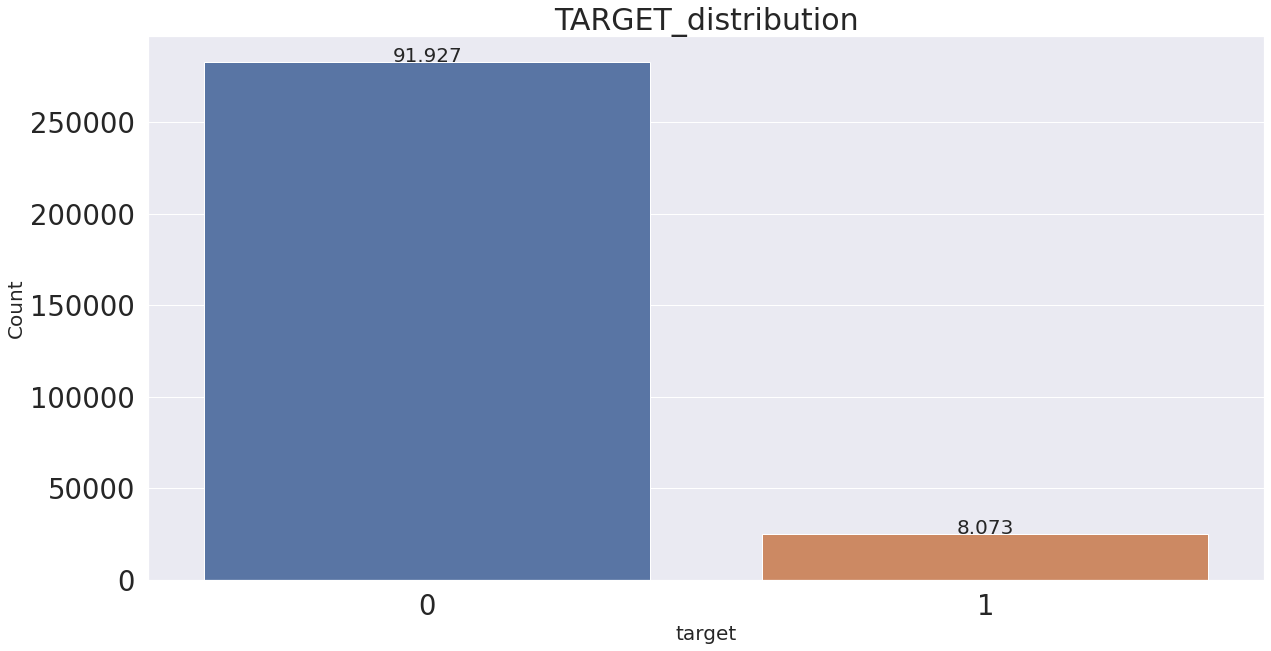

In [8]:
train_cls.countplot_sns('TARGET')

상횐된 대출 샘플이 그렇지 않은 대출의 샘플보다 월등히 많은 `imbalanced problem`
- 학습모델을 보다 정교하게 만들기 위해 클래스에 가중치를 부여할 수 있다

## Examine missing value

In [9]:
train_cls.meta[train_cls.meta.num_of_NaN != 0][['num_of_NaN', 'percent_of_NaN']].sort_values(by='num_of_NaN', ascending=False).head(20)

,num_of_NaN,percent_of_NaN
name,,
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953


## Visualize missing value

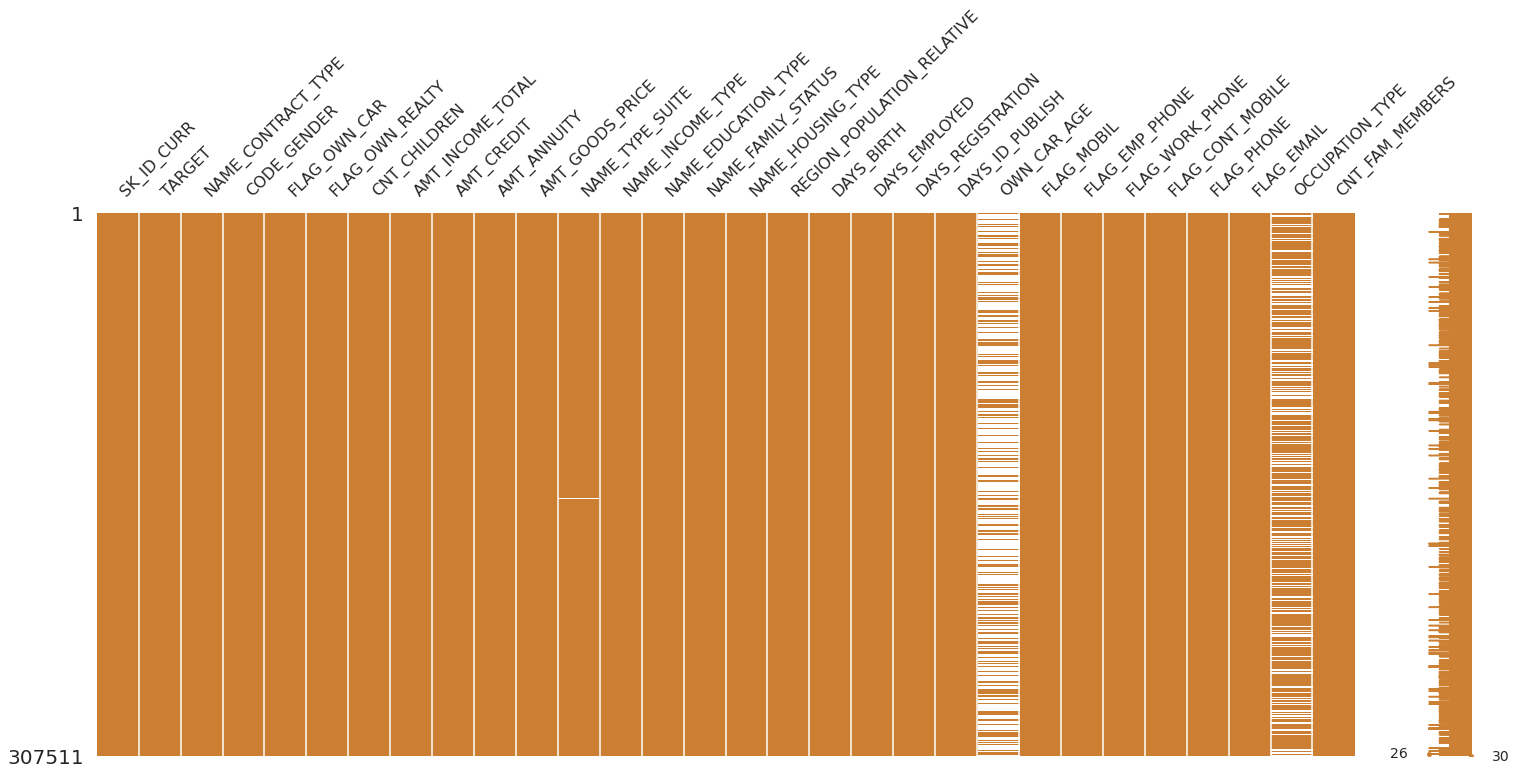

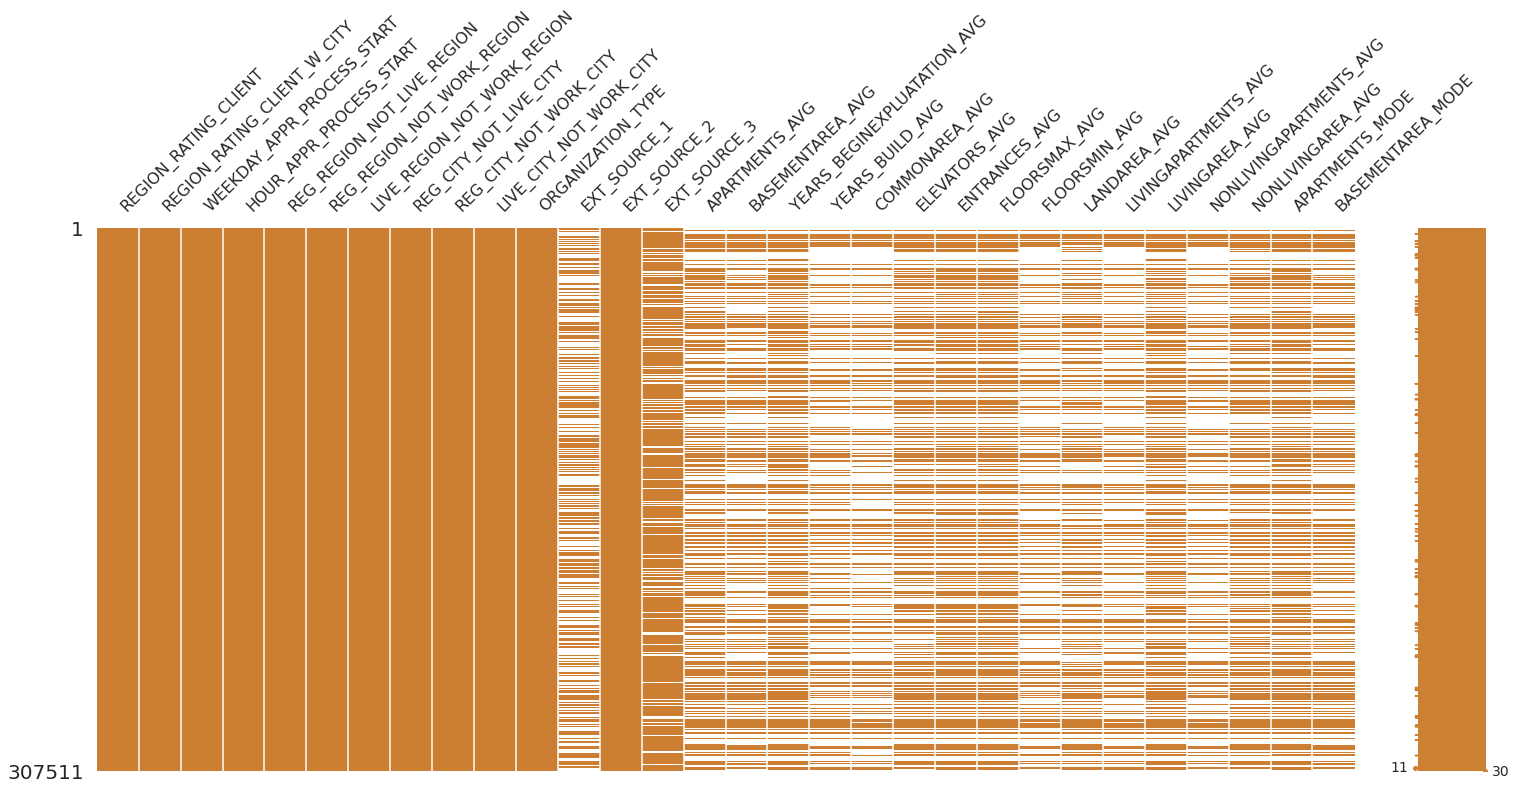

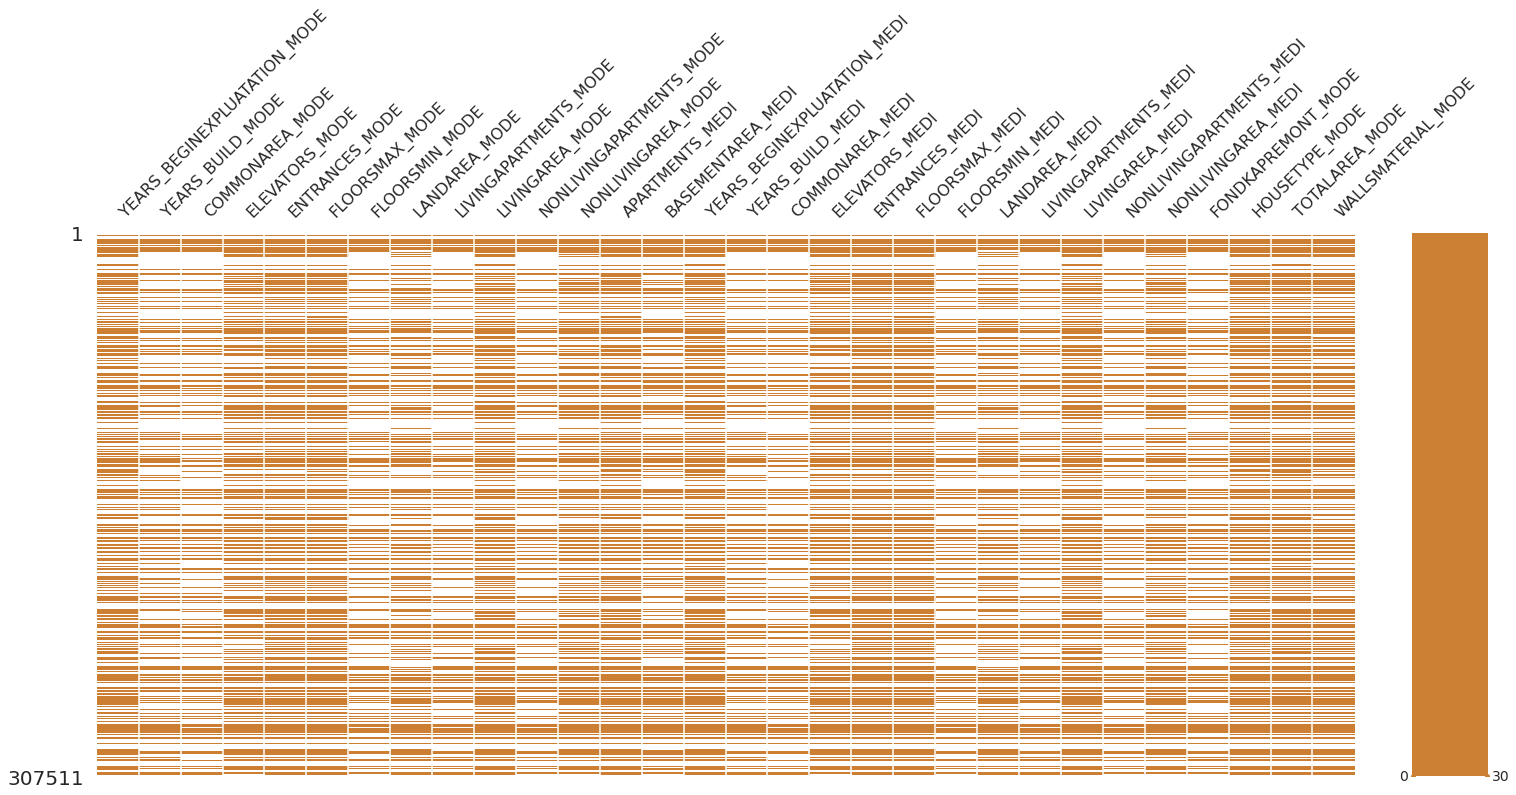

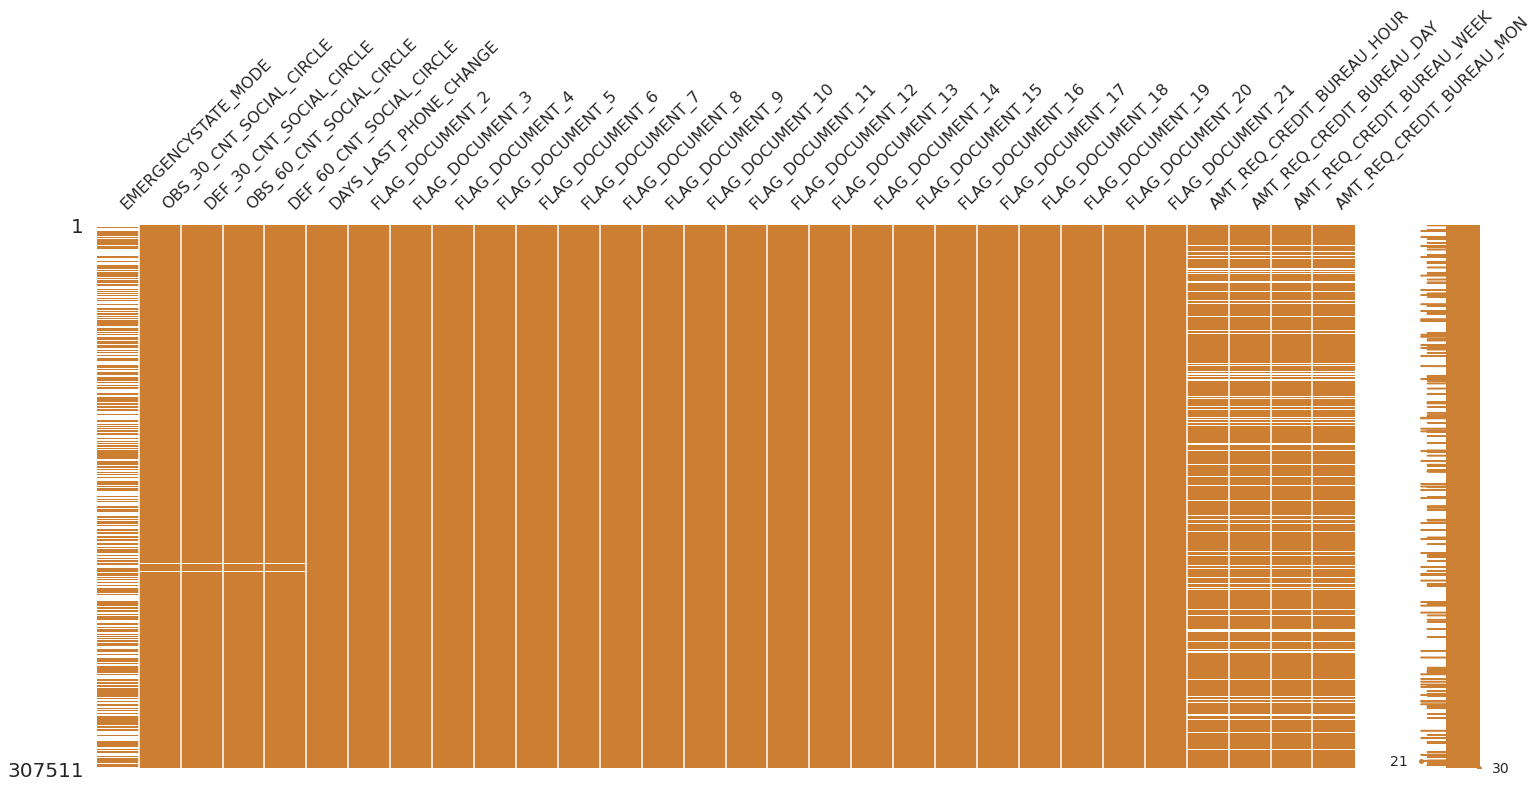

In [10]:
for i in range(len(train_cls.df.columns) // 30):
    if 30 * (i + 1) >= len(train_cls.df.columns):
        train_cls.plot_msno_matrix(start_idx=30 * i)
        break
    elif 30 * (i + 1) < len(train_cls.df.columns):
        train_cls.plot_msno_matrix(start_idx=30 * i, end_idx=30 * (i + 1))

## Column types

In [11]:
train_cls.meta[['dtype']].value_counts()

dtype  
float64    65
int64      41
object     16
dtype: int64

In [12]:
train_cls.df.select_dtypes('object').apply(pd.Series.nunique, axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

대부분의 categorical 특징들은 적은 수의 클래스를 가지고 있다.

## Encoding categorical variables

인코딩 방식에는 크게 `label encoding` 과 `one-hot enconding` 방식이 존재한다.
- 레이블 인코딩: 각 유니크한 범주 클래스를 숫자로 매핑
- 원핫 인코딩: 각 단일 범주 클래스 마다 새로운 열을 추가한 후 해당하는 열을 1로 채운다.
  
대부분의 최신 대규모 머신러닝 모델(랜덤 포레스트, 서포트 벡터 머신, 신경망)등은 수치값으로 작동하기 때문에 카테고리 입력 또한 수치로 입력되어야 한다.

단순히 연속적인 숫자(0, 1, 2 ... )로 카테고리를 분류(`레이블 인코딩`)한다면 모델이 실제 카테고리 입력에서는 존재하지 않는 순서에 대한 패턴을 학습할 위험이 발생한다. 따라서 범주 클래스의 개수가 3개 이상이라면 순서에 대한 독립성을 유지하기 위해 `원 핫 인코딩` 을 사용한다.

원핫 인코딩의 단점은 유니크한 범주의 수가 많을 경우 `차원 수가 크게 증가`할 수 있다는 것이다.

따라서 원핫 인코딩 후에 차원축소 기법을 이용하는 것도 좋다.

### Label Encoding and one-hot encoding

In [13]:
class CategoricalEncoder():
    def __init__(self, df_train, df_test=None):
        self.train = df_train
        self.test = df_test
        
    def label_encoding(self):
        le = LabelEncoder()
        le_count = 0
        cols = []
        for col in self.train:
            if self.train[col].dtype == 'object':
                if len(list(self.train[col].unique())) <= 2:
                    cols.append(col)
                    le.fit(self.train[col])
                    
                    self.train[col] = le.transform(self.train[col])
                    if self.test is not None:
                        self.test[col] = le.transform(self.test[col])
                    
                    le_count += 1

        print(f"{le_count} columns were label encoded")
        print(f"{cols} features were labeled")
        
        return self.train, self.test
    
    
    def one_hot_encoding(self, inplace=False, verbose=False):
        oh = OneHotEncoder(handle_unknown='ignore')
        cols = []
        features_out = []
        
        oh_train = self.train.copy()
        oh_test = self.test.copy()
        for col in self.train:
            if self.train[col].dtype == 'object':
                if len(list(self.train[col].unique())) > 2:
                    cols.append(col)
                    oh.fit(self.train[[col]].dropna(axis=0))
                    oh_train_tmp = pd.DataFrame(oh.transform(self.train[[col]]).todense(), columns=oh.get_feature_names_out())
                    oh_test_tmp = pd.DataFrame(oh.transform(self.test[[col]]).todense(), columns=oh.get_feature_names_out())
                    oh_train = pd.concat([oh_train, oh_train_tmp], axis=1).drop(oh.feature_names_in_, axis=1)
                    oh_test = pd.concat([oh_test, oh_test_tmp], axis=1).drop(oh.feature_names_in_, axis=1)
                    features_out.append(list(oh.get_feature_names_out()))
        
        if verbose:
            print(f"{len(cols)} columns were onehot encoded")
            print(f"{cols} columns were input features")
            print(f"{features_out} columns were output features")
        self.oh = oh
        
        if inplace:
            self.train = oh_train
            self.test = oh_test
        return oh_train, oh_test
    
    def dummy_encoding(self, inplace=False):
        train = pd.get_dummies(self.train)
        test = pd.get_dummies(self.test)
        
        if inplace:
            self.train = train
            self.test = test
            
        return train, test
    
encoder = CategoricalEncoder(app_train, app_test)

In [14]:
app_train, app_test = encoder.label_encoding()

3 columns were label encoded
['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY'] features were labeled


In [15]:
app_train_oh, app_test_oh = encoder.one_hot_encoding()
print(app_train_oh.shape)
print(app_test_oh.shape)
print(encoder.train.shape)
print(encoder.test.shape)

(307511, 243)
(48744, 242)
(307511, 122)
(48744, 121)


In [16]:
app_train_dummy, app_test_dummy = encoder.dummy_encoding()
print(app_train_dummy.shape)
print(app_test_dummy.shape)
print(encoder.train.shape)
print(encoder.test.shape)

(307511, 243)
(48744, 239)
(307511, 122)
(48744, 121)


In [17]:
app_train, app_test = encoder.dummy_encoding()
print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


dummy encoding을 수행할 경우 test_set에 있는 특징의 수와 train_set에 있는 인자의 수가 달라지게 된다.    
머신러닝 모델에서는 훈련에 사용되는 특징과 추롱에 사용되는 인자의 수가 같아야 한다.     
따라서 `pd.align`을 이용하여 test_set에 있는 인자들로만 구성하도록 한다.

In [18]:
def align_features(df_train, df_test, target='TARGET'):
    train_labels = df_train[target]
    df_train, df_test = df_train.align(df_test, join='inner', axis=1)
    
    df_train[target] = train_labels
    
    return df_train, df_test

In [19]:
app_train, app_test = align_features(app_train, app_test)
print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


## Anomalies

EDA를 수행할 때 항상 데이터의 이상치를 파악해야 한다.     
이상치는 숫자의 mis-typing, 측정 장비의 오차 혹은 타당하지만 드물게 발생하는 현상의 결과일 수 있다.     
이상치를 파악하는 방법 중 하나는 판다스의 `describe` 매서드를 사용하는 것이다.

### Days birth

`DAYS_BIRTH` 특징은 current loan app이 기록된 순간부터 사용자의 나이의 일수를 상대적으로 기록했기 때문에 음수의 값을 갖는다.    
따라서 -365를 나눠줌으로써 사용자의 나이로 변환시켜준다.

In [20]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

특별한 이상치없이 적절한 값을 갖는 것으로 보인다.

### Days employed

In [21]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

4분위 값에 비해 max값이 매우 크다. 이상치가 존재하는 것을 보인다.

In [22]:
plt.style.use('fivethirtyeight')
plt.style.use('seaborn')

Text(0.5, 0, 'Days Employment')

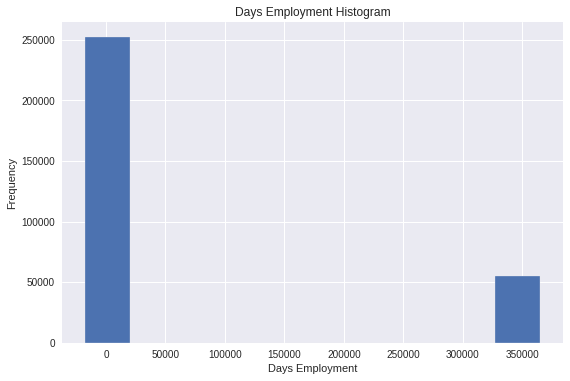

In [23]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment')

이상치를 갖는 고객의 수가 적지 않다. 이상치를 가지고 있는 고객과 이상치를 갖지 않는 고객의 대출 미상환율을 계산해본다.

In [24]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


이상치를 처리하는데는 정해진 규칙이 존재하지 않는다.    
`DAYS_EMPLOTYED` 특징에서 이상치는 모두 하나의 값을 가지고 있고, 무언가 정보를 가지고 있는 것처럼 보인다.    
따라서 모델에 넣기 전 특정 값으로 대체하고, 이상치를 갖는다라는 `binary`특징을 추가하므로써 모델의 학습에 사용한다.

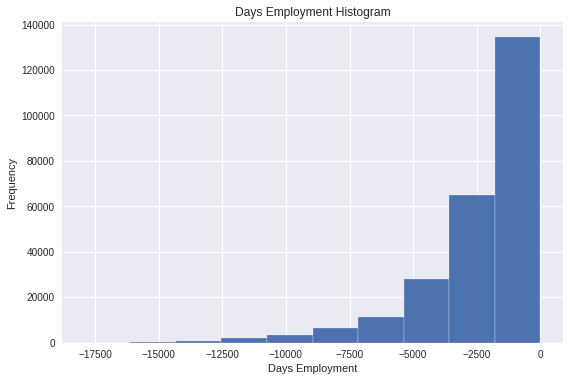

In [25]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

분포가 잘 정돈되어 있는 것을 보인다.     
추후 모델에 데이터를 입력하기 전 nan값은 median과 같은 값으로 바꾸어서 넣어준다.      
테스트 데이터에도 똑같은 처리를 해준다.

In [26]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


## Correlation

데이터를 탐색하는 한가지 방법으로 correlation이 있다.      
판다스의 `.corr` 매서드를 이용하여 pearson correlation을 구할 수 있다.     
pearson correlation이 항상 변수들 사이의 관련성을 보여주는 것은 아니지만, 데이터를 탐색하는 데 있어 영감을 줄 수 있다.

In [27]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

`DAYS_BIRTH` 가장 높은 샹관관계를 갖으나 현재 `DAYS_BIRTH`는 대출일로부터 상대적인 일수를 계산하기 때문에      
양의 상관관계를 갖는다는 것은 실제로는 나이가 많을수록 대출 미상환율이 높다는 것을 의미한다.(target==1은 미상환을 의미한다.)      
이는 데이터를 분석하는데 오해를 만들 수 있으므로 `DAYS_BIRTH`에 절대값을 취해준다.

In [28]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982694

음의 상관관계를 갖는 것을 통해 고객의 나이가 많을수록 대출 상환율이 높다는 것을 알 수 있다.     
히스토그램을 그려서 해당 특징을 좀 더 자세히 살펴본다.

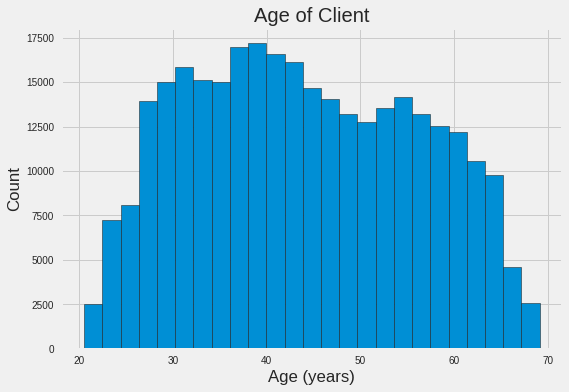

In [29]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

kde을 통해 target별 데이터 분포를 확인해본다.

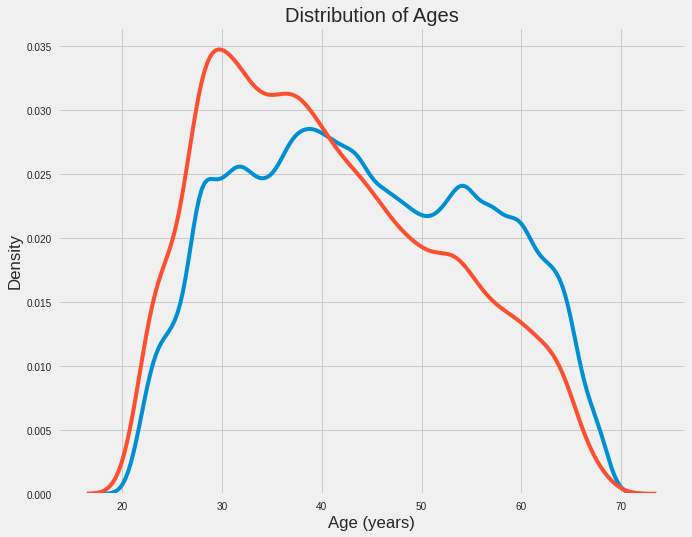

In [30]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

상관관계 값으 작게 나왔지만 target에 따라 유의미한 분포차이가 있는 것으로 보인다.     
나이 구간을 쪼개서 범주형 특징으로 만들어서 분석해본다.

In [34]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [38]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


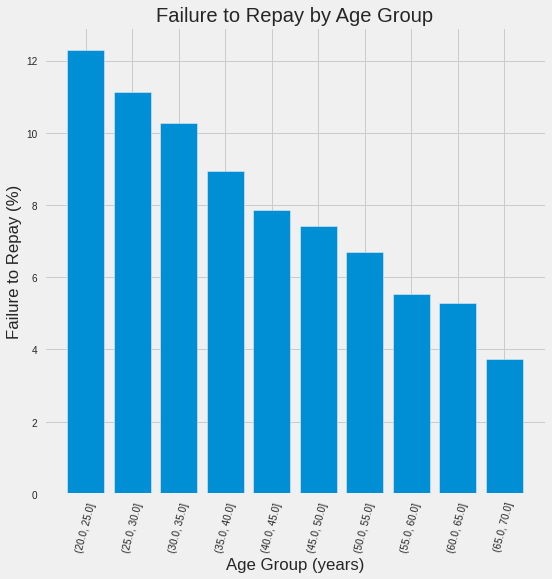

In [39]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

젊은 고객들의 대출 상환률이 낮다는 명확한 경향이 보인다.

## Exterior sources

명확하게 무슨 특징인지는 모르나, 신용등급과 관계있어 보인다.

In [40]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


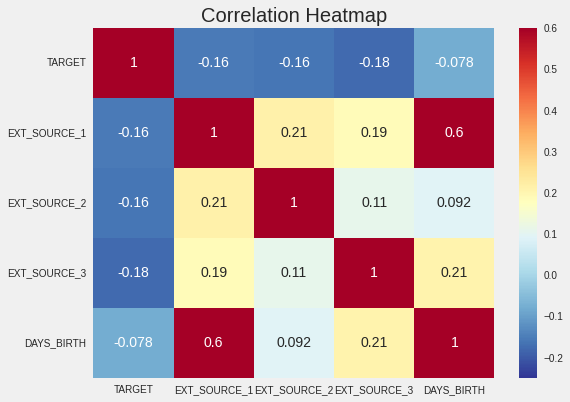

In [41]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

ext_source 특징이 target과 negative한 상관관계를 갖는 것을 통해 ext_source 특징이 커질수록 대출 상환률이 높아지는 것을 알 수 있다.     
ext_source_1과 days_birth 특징이 양의 상관관계를 갖는 것을 통해 ext_source_1의 특징을 구성하는데 days_birth 사용됐을 수 있음을 알 수 있다.

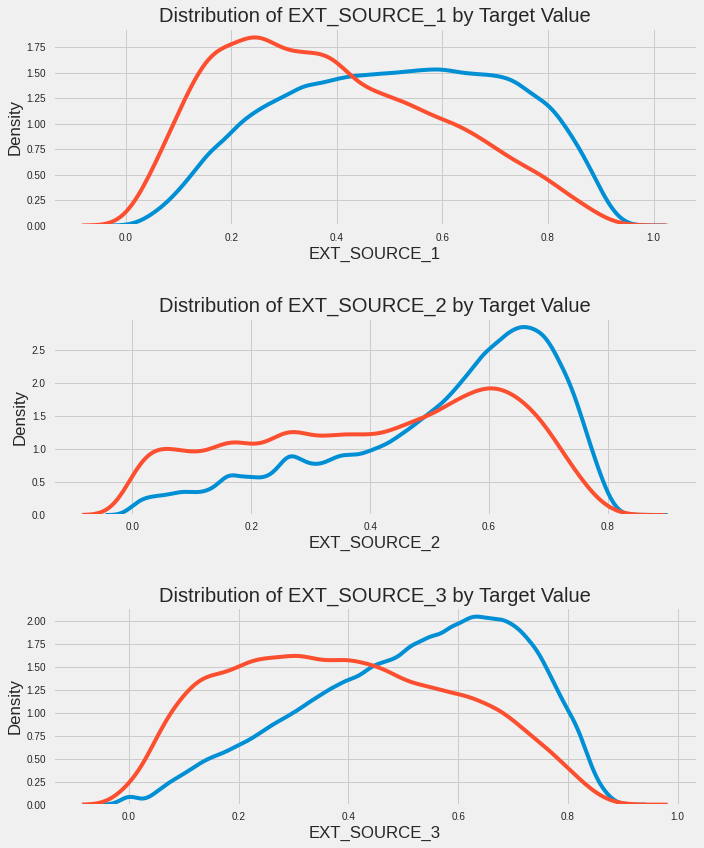

In [42]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

ext_source_3의 경우 target의 차이에 따라 확연한 경향의 차이가 있는 것을 확인할 수 있다.    
세가지 특징 모두 correlation은 크지 않으나, target별로 경향성의 차이가 있는 것을 통해 모델링을 진행할 때 도움이 될 것으로 보인다.

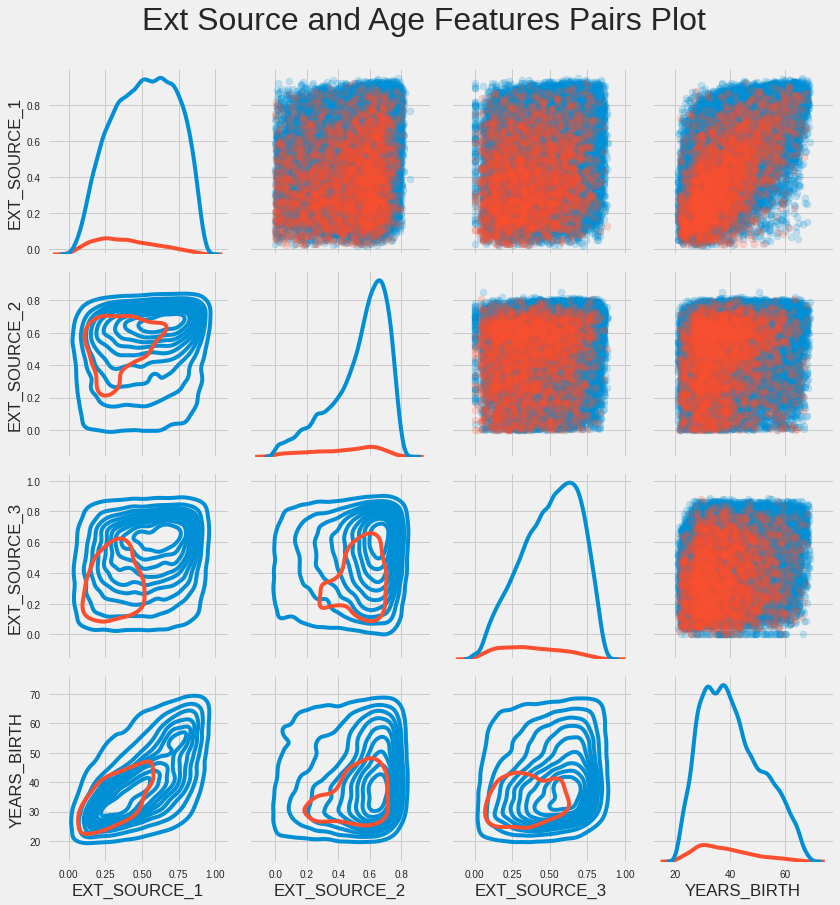

In [44]:
# Copy the data for plotting
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
# def corr_func(x, y, **kwargs):
#     r = np.corrcoef(x, y)[0][1]
#     ax = plt.gca()
#     ax.annotate("r = {:.2f}".format(r),
#                 xy=(.2, .8), xycoords=ax.transAxes,
#                 size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

# Feature engineering

## polynomial features

In [47]:
# Make a new dataframe for polynomial features
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [48]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


새로운 특징 조합이 많아 생긴 것을 확인할 수 있다. `get_feature_names_out`매서드를 이용하여 생성된 특징 조합을 확인할 수 있다.

In [49]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

새로 만들어낸 특징들 사이의 correlation값을 확인해본다.

In [53]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


기존의 특징보다 높은 상관관계를 같은 특징들이 생긴 것을 확인할 수 있다.      
새로 만든 특징을 추가하거나 하지않은 모델을 만들어서 성능을 비교해본다.

In [54]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

Training data with polynomial features shape:  (307511, 275)
Testing data with polynomial features shape:   (48744, 275)


## Domain knowledge features

아래 네가지 특징을 만든다.
- CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income
- ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
- CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due
- DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age

In [55]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

In [56]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

### visualize new variables

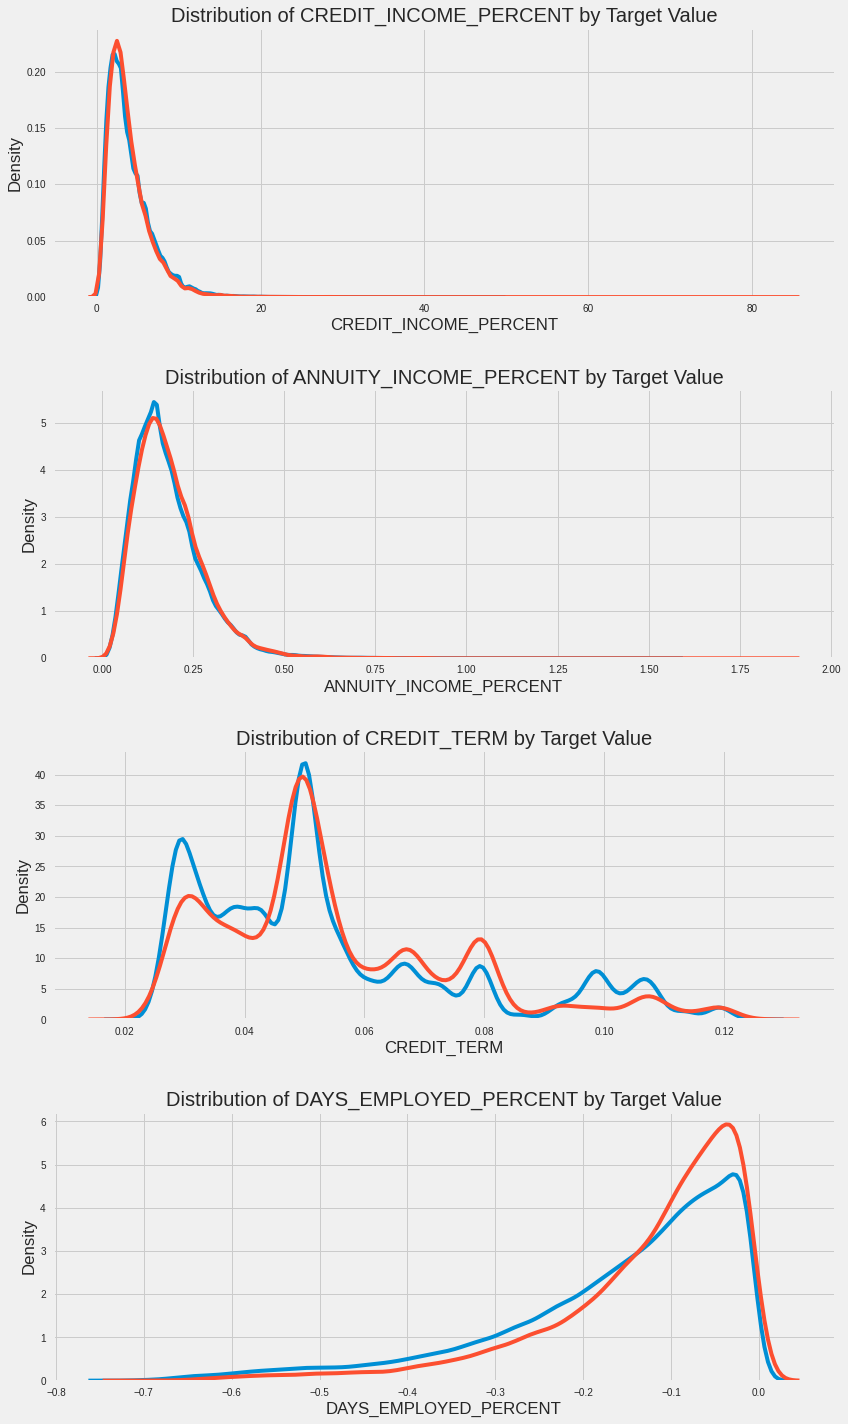

In [57]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

그래프만 봐서는 각 특징들이 유의미한지 명확하지 않다.

# Baseline

간단한 모델을 이용하여 baseline 모델을 만든다.

In [59]:
from sklearn.preprocessing import MinMaxScaler

# Drop the target from the training data
if 'TARGET' in app_train:
    train = app_train.drop(columns = ['TARGET'])
else:
    train = app_train.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = app_test.copy()

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(app_test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (307511, 240)
Testing data shape:  (48744, 240)


In [61]:
from sklearn.linear_model import LogisticRegression
train_labels = app_train['TARGET']

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(train, train_labels)

LogisticRegression(C=0.0001)

In [62]:
# Make predictions
# Make sure to select the second column only
log_reg_pred = log_reg.predict_proba(test)[:, 1]

In [63]:
# Submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

,SK_ID_CURR,TARGET
0,100001,0.078515
1,100005,0.137926
2,100013,0.082194
3,100028,0.080921
4,100038,0.132618


예측값은 대출 미상환 확률에 대한 값을 의미한다.      
기준 값을 조정하여 클래스를 분류할 수 있다.

## Improved model (Random Forest)

In [65]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [69]:
# Train on the training data
random_forest.fit(train, train_labels)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   47.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.5s finished


In [70]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_baseline.csv', index = False)

## Make predictions using engieered features

In [71]:
poly_features_names = list(app_train_poly.columns)

# Impute the polynomial features
imputer = SimpleImputer(strategy = 'median')

poly_features = imputer.fit_transform(app_train_poly)
poly_features_test = imputer.transform(app_test_poly)

# Scale the polynomial features
scaler = MinMaxScaler(feature_range = (0, 1))

poly_features = scaler.fit_transform(poly_features)
poly_features_test = scaler.transform(poly_features_test)

random_forest_poly = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [72]:
# Train on the training data
random_forest_poly.fit(poly_features, train_labels)

# Make predictions on the test data
predictions = random_forest_poly.predict_proba(poly_features_test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.4s finished


In [73]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_baseline_engineered.csv', index = False)

## testing domain features

In [74]:
app_train_domain = app_train_domain.drop(columns = 'TARGET')

domain_features_names = list(app_train_domain.columns)

# Impute the domainnomial features
imputer = SimpleImputer(strategy = 'median')

domain_features = imputer.fit_transform(app_train_domain)
domain_features_test = imputer.transform(app_test_domain)

# Scale the domainnomial features
scaler = MinMaxScaler(feature_range = (0, 1))

domain_features = scaler.fit_transform(domain_features)
domain_features_test = scaler.transform(domain_features_test)

random_forest_domain = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

# Train on the training data
random_forest_domain.fit(domain_features, train_labels)

# Extract feature importances
feature_importance_values_domain = random_forest_domain.feature_importances_
feature_importances_domain = pd.DataFrame({'feature': domain_features_names, 'importance': feature_importance_values_domain})

# Make predictions on the test data
predictions = random_forest_domain.predict_proba(domain_features_test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   50.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.5s finished


In [75]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_baseline_domain.csv', index = False)

## Feature importance

In [76]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

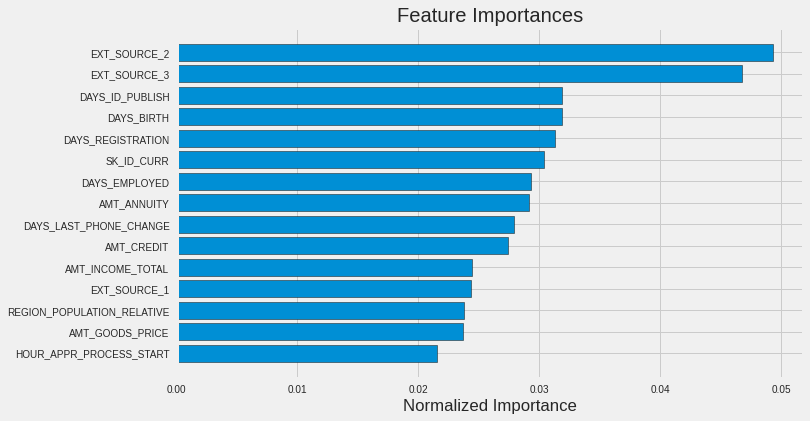

In [77]:
# Show the feature importances for the default features
feature_importances_sorted = plot_feature_importances(feature_importances)

중요도가 높은 인자가 많지 않은 것을 통해 많은 특징들을 사용하지 않아도 되는 것을 알 수 있다.

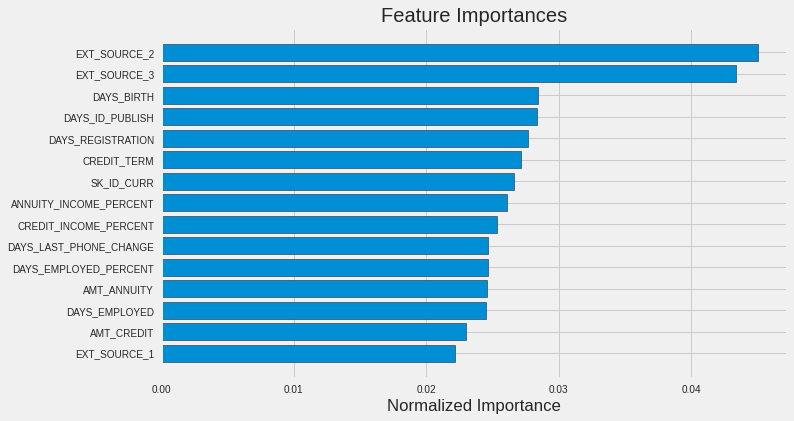

In [78]:
feature_importances_domain_sorted = plot_feature_importances(feature_importances_domain)

새로 만든 4가지 특징들이 모두 중요도가 높은 15개 인자 안에 들어온 것을 확인할 수 있다.

# Light GBM

In [79]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

def model(features, test_features, encoding = 'ohe', n_folds = 5):
    
    """Train and test a light gradient boosting model using
    cross validation. 
    
    Parameters
    --------
        features (pd.DataFrame): 
            dataframe of training features to use 
            for training a model. Must include the TARGET column.
        test_features (pd.DataFrame): 
            dataframe of testing features to use
            for making predictions with the model. 
        encoding (str, default = 'ohe'): 
            method for encoding categorical variables. Either 'ohe' for one-hot encoding or 'le' for integer label encoding
            n_folds (int, default = 5): number of folds to use for cross validation
        
    Return
    --------
        submission (pd.DataFrame): 
            dataframe with `SK_ID_CURR` and `TARGET` probabilities
            predicted by the model.
        feature_importances (pd.DataFrame): 
            dataframe with the feature importances from the model.
        valid_metrics (pd.DataFrame): 
            dataframe with training and validation metrics (ROC AUC) for each fold and overall.
        
    """
    
    # Extract the ids
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    
    # Extract the labels for training
    labels = features['TARGET']
    
    # Remove the ids and target
    features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR'])
    
    
    # One Hot Encoding
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)
        
        # Align the dataframes by the columns
        features, test_features = features.align(test_features, join = 'inner', axis = 1)
        
        # No categorical indices to record
        cat_indices = 'auto'
    
    # Integer label encoding
    elif encoding == 'le':
        
        # Create a label encoder
        label_encoder = LabelEncoder()
        
        # List for storing categorical indices
        cat_indices = []
        
        # Iterate through each column
        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                # Map the categorical features to integers
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))

                # Record the categorical indices
                cat_indices.append(i)
    
    # Catch error if label encoding scheme is not valid
    else:
        raise ValueError("Encoding must be either 'ohe' or 'le'")
        
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
    # Extract feature names
    feature_names = list(features.columns)
    
    # Convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)
    
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # Create the model
        model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
        
        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                  early_stopping_rounds = 100, verbose = 200)
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # Make predictions
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    return submission, feature_importances, metrics

In [80]:
submission, fi, metrics = model(app_train, app_test)
print('Baseline metrics')
print(metrics)

Training Data Shape:  (307511, 239)
Testing Data Shape:  (48744, 239)
[200]	train's auc: 0.798723	train's binary_logloss: 0.547797	valid's auc: 0.755039	valid's binary_logloss: 0.563266
[400]	train's auc: 0.82838	train's binary_logloss: 0.518334	valid's auc: 0.755107	valid's binary_logloss: 0.545575
[200]	train's auc: 0.798409	train's binary_logloss: 0.548179	valid's auc: 0.758332	valid's binary_logloss: 0.563587
[400]	train's auc: 0.828244	train's binary_logloss: 0.518308	valid's auc: 0.758563	valid's binary_logloss: 0.545588
[200]	train's auc: 0.797648	train's binary_logloss: 0.549331	valid's auc: 0.763246	valid's binary_logloss: 0.564236
[200]	train's auc: 0.798855	train's binary_logloss: 0.547952	valid's auc: 0.757131	valid's binary_logloss: 0.562234
[200]	train's auc: 0.797918	train's binary_logloss: 0.548584	valid's auc: 0.758065	valid's binary_logloss: 0.564721
Baseline metrics
      fold     train     valid
0        0  0.816657  0.755215
1        1  0.816900  0.758754
2        

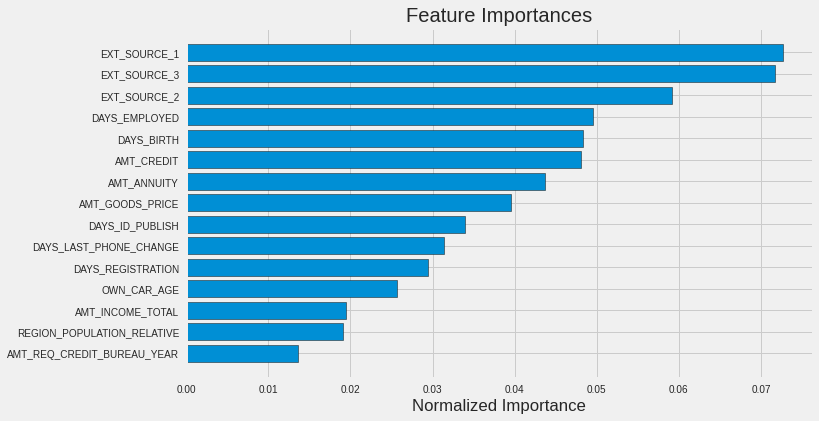

In [81]:
fi_sorted = plot_feature_importances(fi)

In [82]:
submission.to_csv('baseline_lgb.csv', index = False)

In [83]:
app_train_domain['TARGET'] = train_labels

# Test the domain knolwedge features
submission_domain, fi_domain, metrics_domain = model(app_train_domain, app_test_domain)
print('Baseline with domain knowledge features metrics')
print(metrics_domain)

Training Data Shape:  (307511, 243)
Testing Data Shape:  (48744, 243)
[200]	train's auc: 0.804779	train's binary_logloss: 0.541283	valid's auc: 0.762511	valid's binary_logloss: 0.557227
[200]	train's auc: 0.804016	train's binary_logloss: 0.542318	valid's auc: 0.765768	valid's binary_logloss: 0.557819
[200]	train's auc: 0.8038	train's binary_logloss: 0.542856	valid's auc: 0.7703	valid's binary_logloss: 0.557925
[400]	train's auc: 0.834559	train's binary_logloss: 0.511454	valid's auc: 0.770511	valid's binary_logloss: 0.538558
[200]	train's auc: 0.804603	train's binary_logloss: 0.541718	valid's auc: 0.765497	valid's binary_logloss: 0.556274
[200]	train's auc: 0.804782	train's binary_logloss: 0.541397	valid's auc: 0.765076	valid's binary_logloss: 0.558641
Baseline with domain knowledge features metrics
      fold     train     valid
0        0  0.815523  0.763069
1        1  0.807075  0.766062
2        2  0.832138  0.770730
3        3  0.811100  0.765884
4        4  0.819404  0.765249
5  o

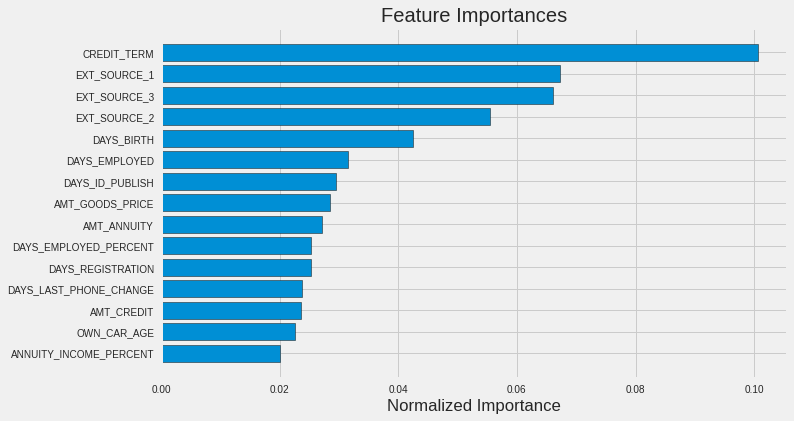

In [84]:
fi_sorted = plot_feature_importances(fi_domain)

In [85]:
submission_domain.to_csv('baseline_lgb_domain_features.csv', index = False)